In [1]:
import sys

from vispy import app, gloo
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np

# %matplotlib inline


def df2pos(df, header_name='NODES'):
    '''
    Uses networkx package to locate the positions of the different nodes.
    
    Input: Connection matrix were the hea
    '''
    # Convert matrix to correct format
    df1 = df.stack().rename('Status').reset_index().query('Status != 0')

    # Make network and get positions
    G = nx.from_pandas_edgelist(df1,'level_1','level_0')
    return nx.spring_layout(G), G

def make_df(nodes, n_cols, n_rows):
    '''
    For testing purposes
    '''
    # Create fake data
    matrix = np.random.randint(0,2, (n_rows, n_cols))
    np.fill_diagonal(matrix, 0)

    # Make connection matrix
    return pd.DataFrame(matrix, index=nodes, columns=nodes)


def draw_basic(G, pos):
    nx.draw(G, pos=pos, alpha=.4)
    for i in pos:
        x, y = pos[i]
        plt.text(x-.05, y+.2, i)

def random_connection(df, n_cols, n_rows, mk_rm='make'):
    if mk_rm == 'make':
        frame = 0
        fill = 1
    else:
        frame = 1
        fill = 0
        
    while True:
        r1 = np.random.randint(n_rows)
        r2 = np.random.randint(n_cols)
        
        if r1 == r2:
            continue
        elif df.iloc[r1, r2] == frame:
            df.iloc[r1, r2] = fill
            break

    return df, r1, r2
        
# name nodes
n_rows = 10
n_cols = 10
nodes = [ 'Node_'+str(i+1) for i in range(n_rows)]
        
# Make figure and fake data datatframe
df = make_df(nodes, n_cols = n_cols, n_rows = n_rows)
fig = plt.figure()

# Make less connections
for i in range(10):
    df, r1, r2 = random_connection(df, n_cols, n_rows, mk_rm='make')

# Get positions and draw the graph
pos, G = df2pos(df)
draw_basic(G, pos)


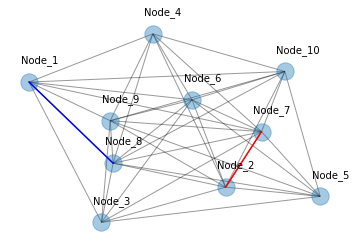

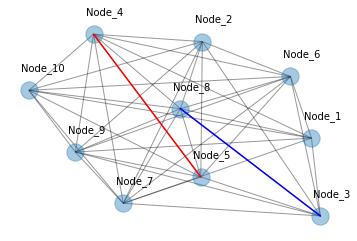

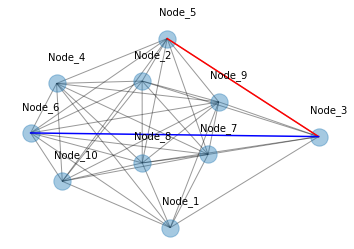

In [2]:

for i in range(3):
    fig = plt.figure()
    df, r1, r2 = random_connection(df, n_cols, n_rows, mk_rm='make')
    df, r3, r4 = random_connection(df, n_cols, n_rows, mk_rm='remove')
    
    node1, node2 = nodes[r1], nodes[r2]
    node3, node4 = nodes[r3], nodes[r4]

    pos, G = df2pos(df)
    
    new_line = [[pos[node1][0], pos[node2][0]], 
                [pos[node1][1], pos[node2][1]]]

    rm_line = [[pos[node3][0], pos[node4][0]], 
                [pos[node3][1], pos[node4][1]]]
    
    plt.plot(new_line[0], new_line[1], color='red')
    plt.plot(rm_line[0], rm_line[1], color='blue')
    
    old_node = [node1, node2]
    
    draw_basic(G, pos)

c:\users\florisfok\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wall time: 7.79 s


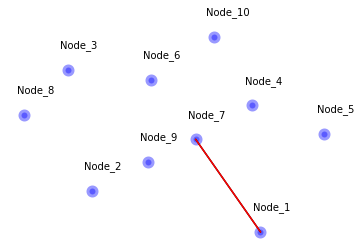

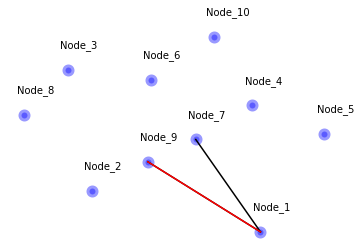

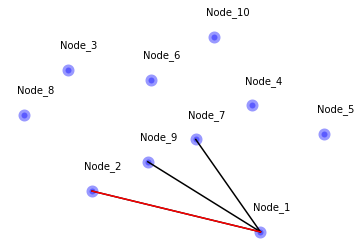

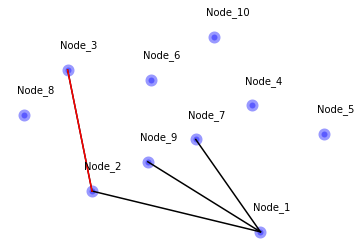

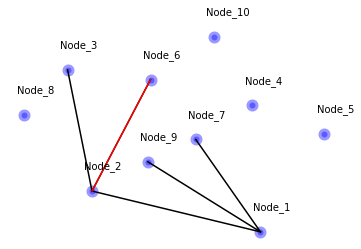

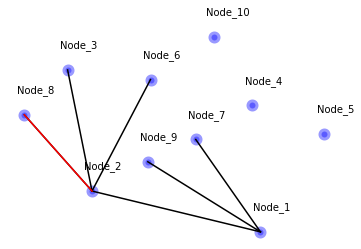

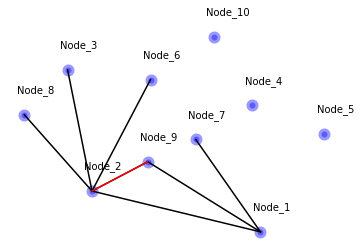

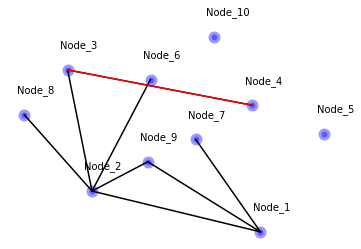

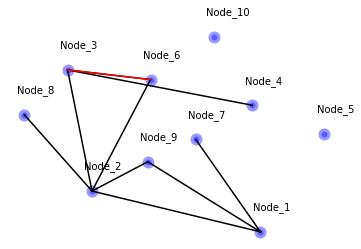

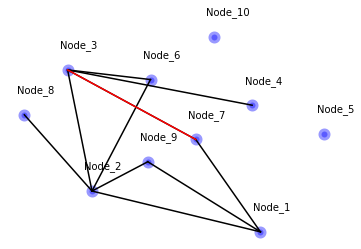

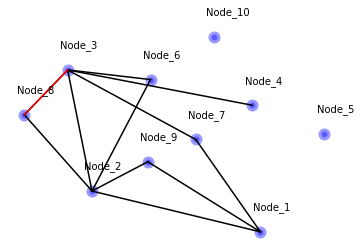

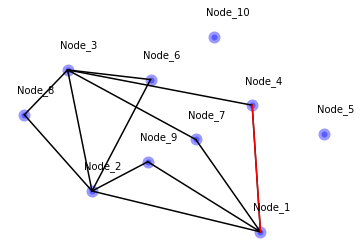

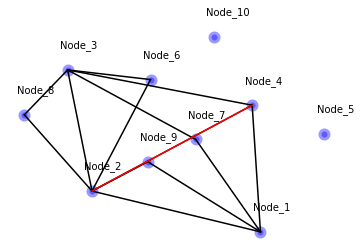

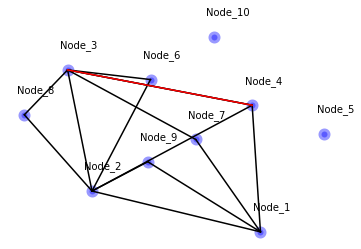

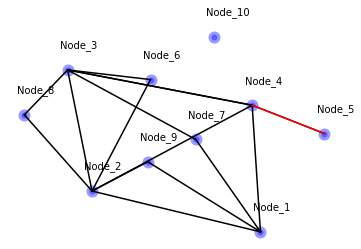

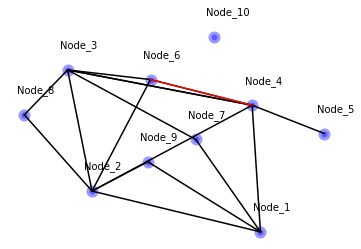

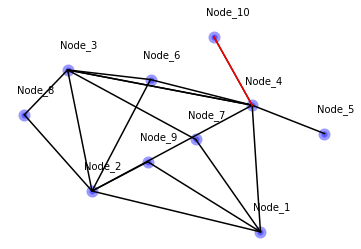

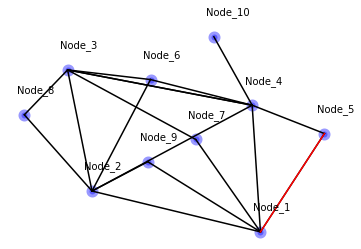

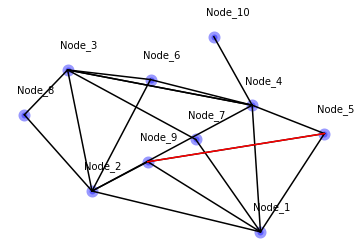

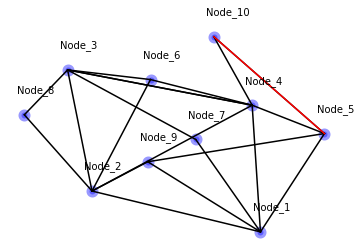

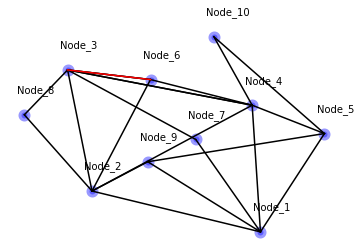

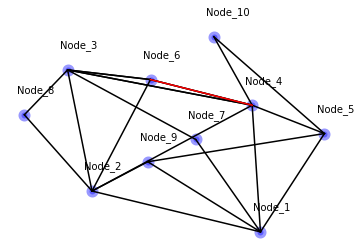

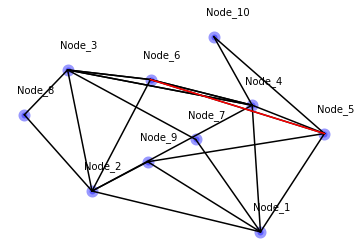

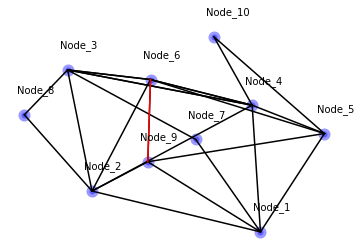

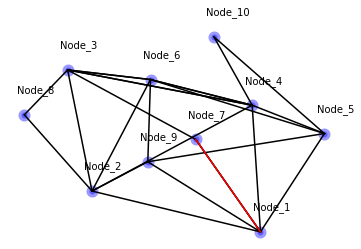

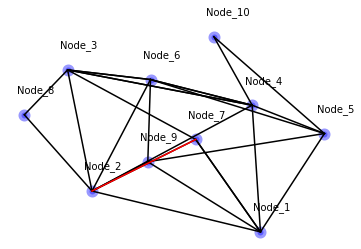

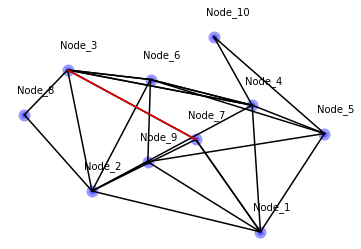

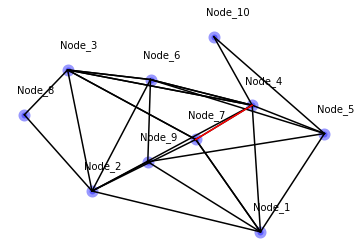

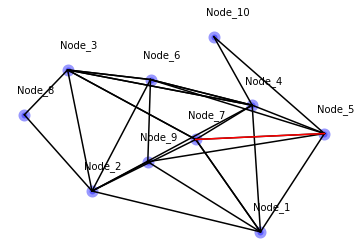

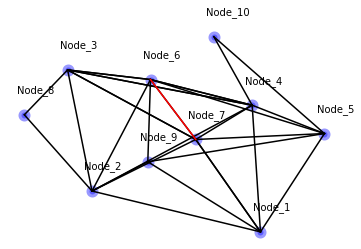

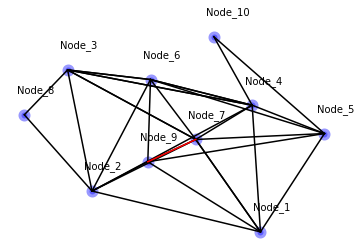

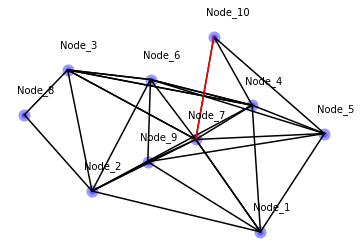

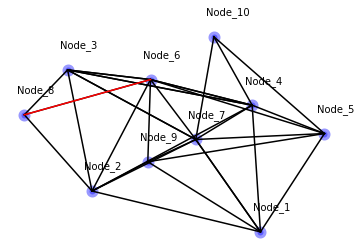

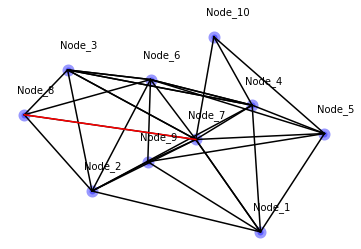

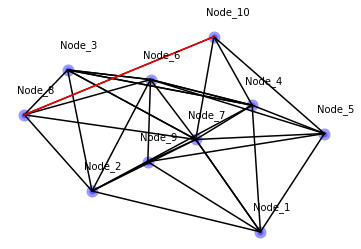

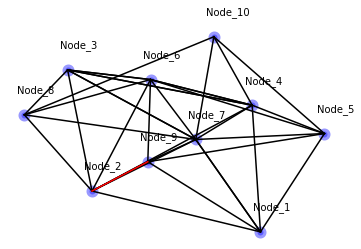

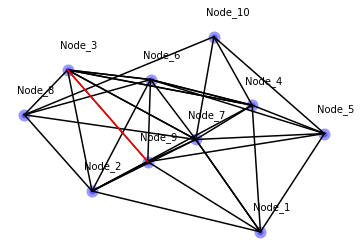

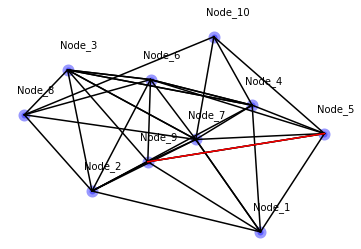

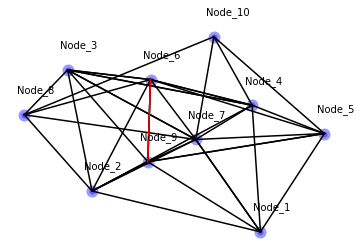

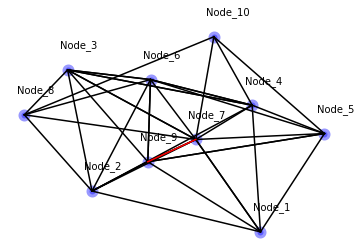

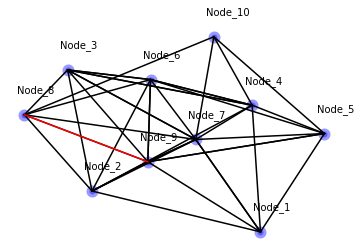

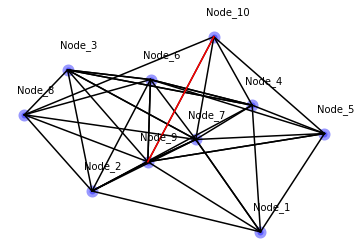

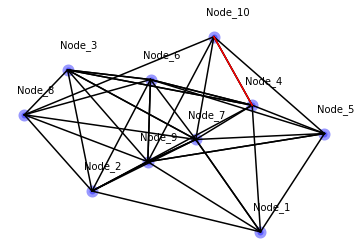

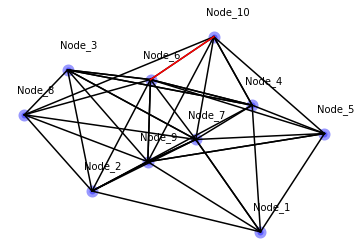

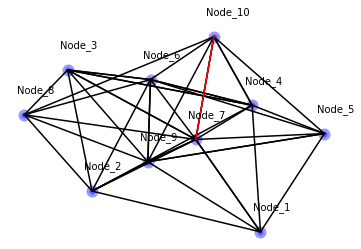

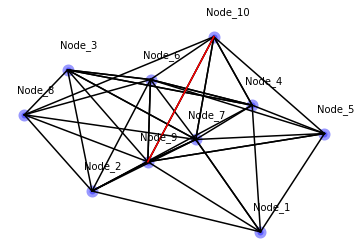

In [5]:
%%time

# Dataframe
def draw(pos):
    for i in pos:
        x, y = pos[i]
        plt.text(x-.05, y+.2, i)
        plt.scatter([x], [y], color='b', linewidth=6, alpha=0.4)

    plt.axis("off")
    
df = make_df(nodes, n_cols = 10, n_rows = 10)
df1 = df.stack().rename('Status').reset_index().query('Status != 0')

# Make network and get positions
G = nx.from_pandas_edgelist(df1,'level_1','level_0')

first = df1['level_0']
second = df1['level_1']

pos = nx.spring_layout(G)

node_list = []
frame = 0
for node1, node2 in zip(first, second):
    fig = plt.figure()
    draw(pos)
    
    new_line = [[pos[node1][0], pos[node2][0]], 
                [pos[node1][1], pos[node2][1]]]
    
    node_list.append(new_line)
    
    for line in node_list:
        plt.plot(line[0], line[1], color='black')
    
    plt.plot(line[0], line[1], color='red')
    
    fig.savefig(f"film\\Frame{frame}.png")
    frame+=1


In [2]:
import film_maker

film_maker.make_video2("film\\", 'avitest', 3, 'Frame')

In [17]:
import numpy as np
import math

def u(i, j, X) :
    """ Returns the partial utility given X_i and X_j using the exp(-b*L1-norm
    of their difference)"""
    return math.exp(-b * np.linalg.norm((X[i] - X[j]), ord=1))

# Gloabal parameter inputs
n = 10 # Number of agents
delta = 0.3 # weight placed on indirect links
gamma = 0.5 # weight placed on additional utility derived from a mutual link
c = 0.2 # cost of forming and maintaining links
b = 0.3 # strength of preference for links to similar agents 
sigma = 0.01 # standard deviation of the shocks to utility
alpha = 2.1 # convexity of costs

share_red = 1/3
share_blue = 1/3
share_green = 1-share_red-share_blue
possible_X = [[1, 0],[0, 1],[1,1]]

# Randomly generate the matrix of characteristics (Generating this randomly is NOT a good idea)
# Note that this way of generating guarantees that X_i=[0,0] does not occur
#X_ind = np.random.choice(len(possible_X), size=n, p=[share_red,share_blue,share_green])
#X = np.array([possible_X[X_ind[i]] for i in range(len(X_ind))])

# Generate proportional green blue and reds for sure (makes simulation more stable)
share_red = np.round(share_red, decimals=1)
share_blue = np.round(share_blue, decimals=1)
X = np.array([possible_X[0] for i in range(int(share_red*n))] + 
              [possible_X[1] for i in range(int(share_blue*n))] +
              [possible_X[2] for i in range(n-int(share_red*n)-int(share_blue*n))])

fuck = 0
for iets in range(1000):
    # Randomly generate the initial network configuration
    p_link_0 = 0.1 # Uniform initial link probability
    g_0 = np.random.choice([0, 1], size=(n,n), p=[1-p_link_0,p_link_0])
    np.fill_diagonal(g_0, 0) # The diagonal elements of the adjacency matrix are 0 by convention
    g_sequence = [g_0] # Sequence of adjacency matrices

    def make_pre_cal_u(n, X):
        """ Make the U matrix for the entire system
        """
        pre_cal_u = np.zeros((n, n))

        for i in range(n):
            for j in range(n):
                pre_cal_u[i, j] = u(i,j,X)

        return pre_cal_u

    pre_U = make_pre_cal_u(n, X)
    g = g_0

    for i in range(n):
        # version 1
        indirect_u = np.zeros((n, n))
        for j in range(n):
            for k in range(n):
                if k == i or k == j: 
                    continue
                else:
                    indirect_u[k][j] = g[i, j] * g[j, k] * pre_U[i][k]
        # Version 2
        a = (g.T.dot(g[i, :]) * pre_U)[i]
        a[i] = 0
        if not (round(np.sum(indirect_u), 2) == round(np.sum(a), 2)):
            print("fuck")
            print(np.sum(indirect_u))
            print(np.sum((g.T.dot(g[i, :]) * pre_U)[i]))
            fuck+=1
fuck


0

In [21]:
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)


for i in range(n):
        indirect_u = np.zeros((n, n))
        for j in range(n):
            for k in range(n):
                if k == i or k == j: 
                    continue
                else:
                    indirect_u[k][j] = g[i, j] * g[j, k] * pre_U[i][k]

        if not (round(np.sum(indirect_u), 2) == round(np.sum((g.T.dot(g[i, :]) * pre_U)[i]), 2)):
            print("fuck")
            print(np.sum(indirect_u))
            a = (g.T.dot(g[i, :]) * pre_U)[i]
            a[i] = 0
            print(sum(a))
            fuck+=1

fuck
1.097623272188053
1.097623272188053
fuck
1.8384414928697708
1.8384414928697708


In [32]:
z = np.zeros(100)
z[i-1] =1

In [35]:
z[i-2:i].any() == np.zeros(2).any()

False

In [34]:
z[i-2:i]

array([0.00, 1.00])

In [759]:
pre_U

array([[1.        , 0.54881164, 0.74081822, 0.74081822, 0.74081822],
       [0.54881164, 1.        , 0.74081822, 0.74081822, 0.74081822],
       [0.74081822, 0.74081822, 1.        , 1.        , 1.        ],
       [0.74081822, 0.74081822, 1.        , 1.        , 1.        ],
       [0.74081822, 0.74081822, 1.        , 1.        , 1.        ]])

In [670]:
d = g.dot(pre_U*f)
d.dot(g.T*f)

array([[0.        , 0.74081822, 0.74081822, 0.        , 0.54881164],
       [0.74081822, 0.        , 0.74081822, 0.        , 0.74081822],
       [0.74081822, 0.74081822, 1.48163644, 0.        , 1.28962986],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.54881164, 0.74081822, 1.28962986, 0.        , 0.        ]])

In [627]:
g.dot(g) * pre_U

array([[0.        , 0.54881164, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [676]:
a = np.multiply(g, pre_U)
np.multiply(a, g[::-1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.74081822, 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [677]:
g

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [678]:
pre_U

array([[1.        , 0.54881164, 0.74081822, 0.74081822, 0.74081822],
       [0.54881164, 1.        , 0.74081822, 0.74081822, 0.74081822],
       [0.74081822, 0.74081822, 1.        , 1.        , 1.        ],
       [0.74081822, 0.74081822, 1.        , 1.        , 1.        ],
       [0.74081822, 0.74081822, 1.        , 1.        , 1.        ]])

In [686]:
g * g[::-1]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [711]:
g[i,:] * g.T * pre_U[:,i]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.74081822, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [710]:
pre_U[:,i]

array([0.74081822, 0.74081822, 1.        , 1.        , 1.        ])

In [709]:
g[i,:] * g.T

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [832]:
import os
import pickle

In [831]:
os.listdir()

['.git',
 '.idea',
 '.ipynb_checkpoints',
 'avitest.avi',
 'film',
 'film_maker.py',
 'gsec.p',
 'LICENSE',
 'matrix_visualisation.ipynb',
 'README.md',
 'test.mp4v',
 'toy_model.py',
 'toy_model2.py',
 '__pycache__']

In [836]:
gsec[-2]

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [846]:
if np.zeros(5)[:2] == np.zeros(2):
    print(9)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
import numpy as np

# Gloabal parameter inputs
n = 10 # Number of agents
delta = 0.3 # weight placed on indirect links
gamma = 0.5 # weight placed on additional utility derived from a mutual link
c = 0.2 # cost of forming and maintaining links
b = 0.3 # strength of preference for links to similar agents
sigma = 0.01 # standard deviation of the shocks to utility
alpha = 2.1 # convexity of costs

share_red = 1/3
share_blue = 1/3
share_green = 1-share_red-share_blue
possible_X = [[1, 0],[0, 1],[1,1]]

# Randomly generate the matrix of characteristics (Generating this randomly is NOT a good idea)
# Note that this way of generating guarantees that X_i=[0,0] does not occur
#X_ind = np.random.choice(len(possible_X), size=n, p=[share_red,share_blue,share_green])
#X = np.array([possible_X[X_ind[i]] for i in range(len(X_ind))])

# Generate proportional green blue and reds for sure (makes simulation more stable)
share_red = np.round(share_red, decimals=1)
share_blue = np.round(share_blue, decimals=1)
X = np.array([possible_X[0] for i in range(int(share_red*n))] +
              [possible_X[1] for i in range(int(share_blue*n))] +
              [possible_X[2] for i in range(n-int(share_red*n)-int(share_blue*n))])

# Randomly generate the initial network configuration
p_link_0 = 0.1 # Uniform initial link probability
g_0 = np.random.choice([0, 1], size=(n,n), p=[1-p_link_0, p_link_0])
np.fill_diagonal(g_0, 0)

In [12]:
int(share_red*n)*[possible_X[0]]

[[1, 0], [1, 0], [1, 0]]

In [7]:
g_0

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])